In [ ]:
#Bank Term Basic infor EDA

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv("C:/Users/X1 Carbon/Downloads/data/bank-additional-full.csv", sep=';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
#here I try to finding missing values
print(df.info())
print("\nMissing values :\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
df.tail()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


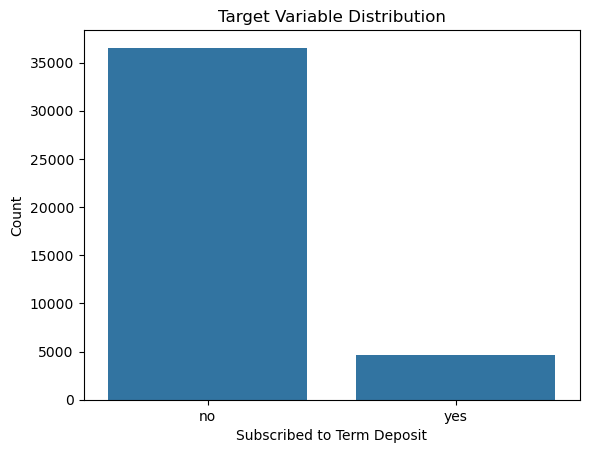

In [17]:
#I then try to find the target destribution
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

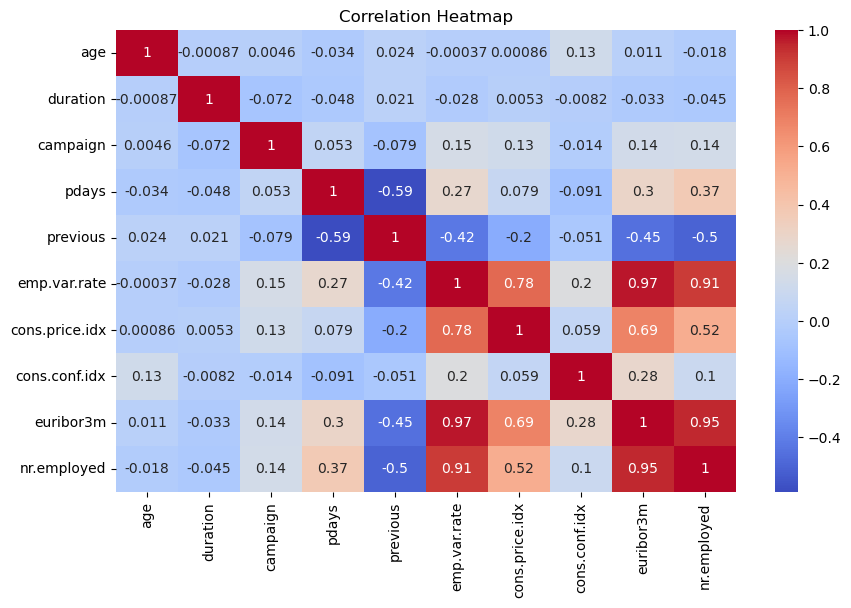

In [18]:
#I then use numeric features to find the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


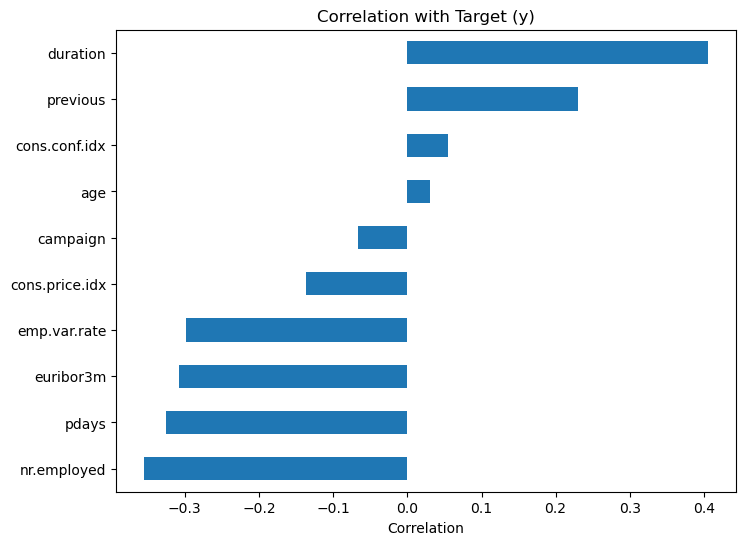

In [20]:
# Encode the target for correlation
df_encoded = df.copy()
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

# Compute correlation with target
corr_with_target = df_encoded.corr(numeric_only=True)['y'].drop('y')

# Bar plot
corr_with_target.sort_values().plot(kind='barh', figsize=(8,6), title='Correlation with Target (y)')
plt.xlabel('Correlation')
plt.show()

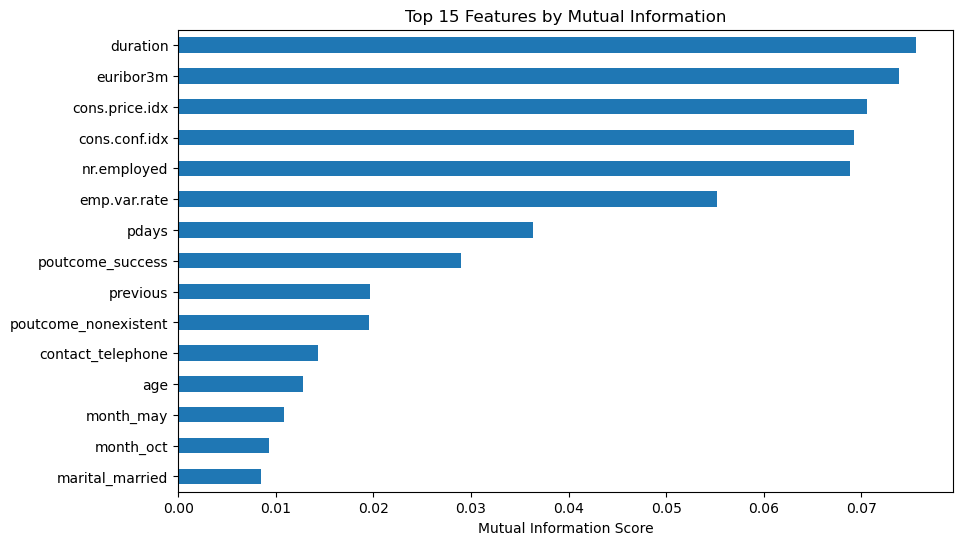

In [49]:


# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Computing mutual information
mi = mutual_info_classif(X, y, discrete_features='auto')

# The plot
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(10,6))
plt.title("Top 15 Features by Mutual Information")
plt.xlabel("Mutual Information Score")
plt.show()




In [24]:
#Now I begin to egnineer my feature processing

In [25]:
#Endconding of categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

#Next I scale numeric variables
scaler = StandardScaler()
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

#Here I define features and target
x = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

#I use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

#Next I split the dataset
X_train, X_test, y_train,y_test = train_test_split(X_resampled, y_resampled, test_size = 0.9, random_state = 42)
            

In [26]:
#Building of my Predictive Model

In [27]:
#Training a Random Forest Model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

In [28]:
#Evaluation of Model Performance

In [29]:
#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n"), report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9354887743779166
Precision: 0.9174823549914316
Recall: 0.9574732502803796
F1 Score: 0.9370513200830614

Classification Report:

[[29955  2841]
 [ 1403 31588]]
              precision    recall  f1-score   support

       False       0.96      0.91      0.93     32796
        True       0.92      0.96      0.94     32991

    accuracy                           0.94     65787
   macro avg       0.94      0.94      0.94     65787
weighted avg       0.94      0.94      0.94     65787



In [30]:
#Feature Importance of my Model

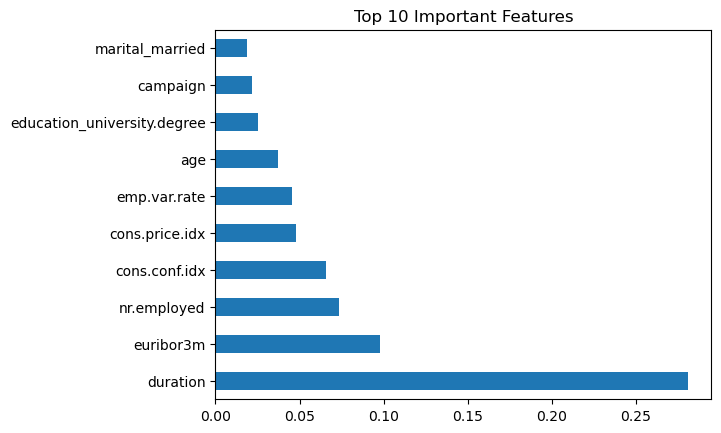

In [31]:
importance = pd.Series(model.feature_importances_, index = x.columns)
importance.nlargest(10).plot(kind ='barh')
plt.title("Top 10 Important Features")
plt.show()


In [41]:
#Saving model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
    

In [43]:
# Saving scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [45]:
# Saving list of feature names
with open("feature_names.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

In [47]:
# Saving numeric features
with open("numeric_features.pkl", "wb") as f:
    pickle.dump(num_cols, f)